<center><img src="https://static1.squarespace.com/static/5f7e1ba80e679669cd82f3a6/t/5f8bb1dbcfa41b2e087b2bac/1607995038419/?format=1500w" width="600" height="200"></center>
<br>
<center>
<a href="https://colab.research.google.com/github/center-for-new-data/introductory-materials/blob/main/notebooks/ElectoralFairness.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>
</center>

# Hello!

Welcome to the Center for New Data's introductory materials repository. If you are unfamiliar with the Center for New Data, check out our <a href="https://www.newdata.org/">website</a>. 

We are an all-volunteer, non-profit organization originally convened at the start of the U.S. COVID-19 pandemic as the COVID Alliance. Our volunteers span technologists, policy researchers, and entrepreneurs. In the past year, the Center for New Data stood up an end-to-end data, insights, and research platform -- designed to ingest complex, sensitive data; protecting it with state-of-the-art privacy controls. Volunteers on the platform produce data products and analyses useful to governments, non-partisan policy groups, and academic researchers.

We acquire novel data sources; turn raw data into usable data by cultivating collaborative processing and featurization; and finally, offer new data to researchers, policymakers,  media, and the public at large.

# The 2020 Election

Many Americans consider the 2020 election a turning point for the United States. Joe Biden (D) won over 7 million more votes than incumbent Donald Trump (R), but the election could have easily gone very differently. The <a href="https://www.cfr.org/blog/2020-election-numbers"> Council on Foreign Relations </a> noted
> If Trump picked up the right mix of 42,921 votes in Arizona (10,457), Georgia (11,779), and Wisconsin (20,682), the Electoral College would have been tied at 269 all...If Trump had also picked up the one electoral vote in Nebraska’s Second Congressional District, which he lost to Biden by 22,091 votes, he would have won the Electoral College outright.

The fate of the country was within the margin of error, or more to the point, within the margin of voter supression. The 2020 cycle was rife with voter supression tactics including <a href="https://www.texastribune.org/2020/10/27/texas-voting-elections-mail-in-drop-off/"> Texas's decision </a> to limit all counties (including Harris County, home to 4.7 million people) to a single ballot dropoff location during early voting. 

Voter suppression tends to affect minority populations. For example, according to the <a href="https://www.aclu.org/news/civil-liberties/block-the-vote-voter-suppression-in-2020/"> ACLU </a>, 70% of people purged from voter rolls in 2018 were black. <a href="https://www.nber.org/papers/w26487">One study </a> showed that in 2016, "residents of entirely-black neighborhoods waited 29% longer to vote and were 74% more likely to spend more than 30 minutes at their polling place." 

The January 5 Senate runoff elections in Georgia were not different. The State attempted to erect barriers to voting by <a href="https://www.nbcnews.com/politics/2020-election/georgia-counties-cut-back-early-voting-sites-ahead-senate-runoffs-n1250307"> closing a number of early vote polling locations </a> in the 10 most populous counties in the state.

# The Data

The Center for New Data's Observing Democracy project, working in conjunction with <a href="https://fairfight.com/">Fair Fight</a>, produced analysis demonstrating that these closures would significantly impede voting. Using novel data sources, C4ND calculated wait times at every polling location in Georgia during the early vote cycle. These data allowed us focus on the locations tagged for closure. We looked at the percentage of voters waiting over 30 minutes at the polls as the <a href="http://web.mit.edu/supportthevoter/www/files/2014/01/Amer-Voting-Exper-final-draft-01-09-14-508.pdf"> Presidential Commission on Election Administration 2014 report </a> stated
>No citizen should have to wait more than 30 minutes to vote[.]

In this notebook, we will explore C4ND wait time data and determine if these were sites voters could afford to lose. As we will see, the answer was a resounding no.

## Read in the data

In [14]:
import pandas as pd

In [17]:
path_to_data_in_github = "https://raw.githubusercontent.com/center-for-new-data/introductory-materials/main/data/percent-waiting-over-thirty-minutes-ga-early-vote.csv"
ga_early_vote_wait_time_df = pd.read_csv(path_to_data_in_github)

## Preview the data

In [18]:
ga_early_vote_wait_time_df.head()

,PERCENT_WAITING_OVER_THIRTY_MINUTES,CND_POLL_UUID,NAME,STATE,COUNTY_NAME,SLATED_FOR_CLOSURE_IN_GA
0,0.067708,8456f9b7c22db5f23468de9845a4ec77,LANIER COUNTY BOARD OF ELECTIONS,GA,LANIER,False
1,0.120567,31c93de830da9b0ce2d57a4cd4b49fcb,OLDE ATLANTA CLUBHOUSE,GA,FORSYTH,True
2,0.514493,1dbfdd8a6fc6efdfb126a08e1f504d10,REGISTRAR'S OFFICE,GA,SCREVEN,False
3,0.173640,cc2702e45c29ac747a3bf28dcc229199,REGISTRATION & ELECTIONS OFFICE,GA,BALDWIN,False
4,0.528261,84b4c216a11317a5e9e6e569ad574bf8,GOVERNMENT CENTER,GA,TROUP,False


We have five features:
- A UUID per polling location
- The name of the location
- The state of the location. In this case, it is always Georgia
- The location's county
- A boolean variable indicating whether or not Georgia planned to close the site for the runoff
- The proportion of voters C4ND calculated waited over 30 minutes at the poll during the early vote period.

We have limited our sample to those locations with at least 25 unique devices.

# First Pass at Detecting Voter Suppression

In [19]:
pd.DataFrame(ga_early_vote_wait_time_df.SLATED_FOR_CLOSURE_IN_GA.value_counts())

,SLATED_FOR_CLOSURE_IN_GA
False,255
True,38


About 13% of locations were slated for closure. The State would likely argue that closing these locations would not affect the election results. It would help the State's case if they could prove that communities had an excess of voting locations. Polling locations slated for closure would have to have low wait times for the State to argue they are unecessary. 

In [20]:
import matplotlib.pyplot as plt

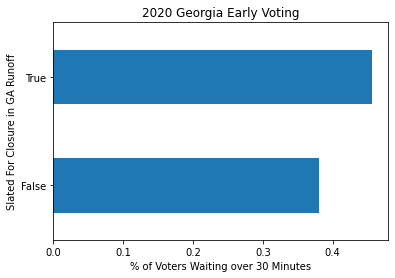

In [21]:
ga_early_vote_wait_time_df.groupby('SLATED_FOR_CLOSURE_IN_GA').PERCENT_WAITING_OVER_THIRTY_MINUTES.mean().plot(kind='barh')
plt.title('2020 Georgia Early Voting')
plt.ylabel("Slated For Closure in GA Runoff")
plt.xlabel("% of Voters Waiting over 30 Minutes")
plt.show()

We can already see that on average, polls that were slated for closure had a higher percentage of voters waiting over 30 minutes during the early vote period. This directly refutes the notion that these polls were not needed since. They were responsible for significant voting traffic.

# Digging Slightly Deeper

Perhaps there are some locations slated for closure that were truly not needed. The selection may be a mixed bag. We take a look at a histogram for those locations slated for closure.

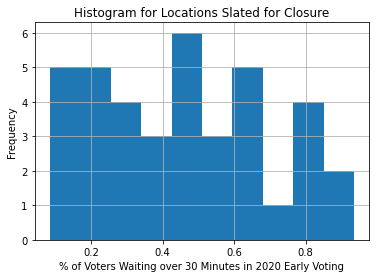

In [22]:
ga_early_vote_wait_time_df[ga_early_vote_wait_time_df.SLATED_FOR_CLOSURE_IN_GA].PERCENT_WAITING_OVER_THIRTY_MINUTES.hist()
plt.title('Histogram for Locations Slated for Closure')
plt.xlabel("% of Voters Waiting over 30 Minutes in 2020 Early Voting")
plt.ylabel("Frequency")
plt.show()

It looks like there are some locations slated for closure with extremely high percentages of voters waiting over 30 minutes.

In [23]:
ga_early_vote_wait_time_df = ga_early_vote_wait_time_df.sort_values(by='PERCENT_WAITING_OVER_THIRTY_MINUTES',
                                                                    ascending=False).reset_index(drop=True)
ga_early_vote_wait_time_df[['NAME','COUNTY_NAME','SLATED_FOR_CLOSURE_IN_GA','PERCENT_WAITING_OVER_THIRTY_MINUTES']].head(11)

,NAME,COUNTY_NAME,SLATED_FOR_CLOSURE_IN_GA,PERCENT_WAITING_OVER_THIRTY_MINUTES
0,COURTHOUSE ANNEX,HARRIS,False,0.938931
1,PORTER MEMORIAL LIBRARY,NEWTON,True,0.936170
2,1270-ATLANTA WEST PENTECOSTAL CHURCH,DOUGLAS,True,0.917526
3,BOARD OF ELECTIONS,HOUSTON,False,0.911504
4,3 NORTHEAST - THE ART PLACE,COBB,True,0.845015
5,5 SOUTH CENTRAL-S. COBB REGIONAL LIBRARY,COBB,True,0.838440
6,EAST SIDE ADV. VOTING SITE AT CENTRAL COMPLEX,COWETA,False,0.838224
7,HOUSTON HEALTH PAVILION CONF CENTER,HOUSTON,False,0.828571
8,A11 SMYRNA- COMMUNITY CENTER,COBB,True,0.827316
9,PICKENS COUNTY BOARD OF ELECTIONS & REGISTRATION,PICKENS,False,0.822430


Remarkably, Georgia chose to close five of the top ten locations in terms of percentage of voters waiting over 30 minutes. These locations were needed. We supplied these and other findings to Fair Fight. Thanks to their efforts in the run up to the election, many of them were kept open.

# Signing Off!

We hope you have enjoyed this introduction to the Center for New Data's research process! If you have any questions or would like to apply to volunteer with our team, please send us an email <a href="https://www.newdata.org/contact-us"> here </a>.